In [1]:
# importing libraries
import pandas as pd
import numpy as np


In [2]:
# reading files

data = pd.read_csv('Admission_predict.csv', encoding = 'latin-1')
#u = pd.read_csv('Admission_predict.csv', encoding = 'latin-1')

In [3]:
data.columns

Index(['Serial No.', 'GREScore', 'TOEFLScore', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admit '],
      dtype='object')

In [4]:
data.head(10)

,Serial No.,GREScore,TOEFLScore,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,7,321,109,3,3.0,4.0,8.20,1,0.75
6,8,308,101,2,3.0,4.0,7.90,0,0.68
7,9,302,102,1,2.0,1.5,8.00,0,0.50
8,10,323,108,3,3.5,3.0,8.60,0,0.45
9,11,325,106,3,3.5,4.0,8.40,1,0.52


In [5]:
str(data)

'     Serial No.  GREScore  TOEFLScore  University Rating  SOP  LOR   CGPA  \\\n0             1       337         118                  4  4.5   4.5  9.65   \n1             2       324         107                  4  4.0   4.5  8.87   \n2             3       316         104                  3  3.0   3.5  8.00   \n3             4       322         110                  3  3.5   2.5  8.67   \n4             5       314         103                  2  2.0   3.0  8.21   \n5             7       321         109                  3  3.0   4.0  8.20   \n6             8       308         101                  2  3.0   4.0  7.90   \n7             9       302         102                  1  2.0   1.5  8.00   \n8            10       323         108                  3  3.5   3.0  8.60   \n9            11       325         106                  3  3.5   4.0  8.40   \n10           12       327         111                  4  4.0   4.5  9.00   \n11           13       328         112                  4  4.0 

In [6]:
data=data.rename(columns={'Admit ':'Admit'})

In [7]:
data=data.fillna(-999)

In [8]:
# Checking the data using head function 
#training dataset by splitting
str(data)
data.head()
from sklearn.model_selection import train_test_split
#x=data.iloc[:,:1].values
#y=data.iloc[:,:-1].values
y=data.Admit

x=data.drop(['Admit','Serial No.', 'Research'],axis=1)
# x=data.drop('Serial No.',axis=1)
# x=data.drop('Research',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)




In [9]:
x_train.shape

(239, 6)

In [10]:
x_test.shape


(160, 6)

In [11]:
x_test.head()

,GREScore,TOEFLScore,University Rating,SOP,LOR,CGPA
56,298,99,2,4.0,2.0,7.60
370,324,110,3,3.5,3.0,9.22
74,329,114,2,2.0,4.0,8.56
21,328,116,5,5.0,5.0,9.50
155,315,105,3,2.0,2.5,8.34


In [12]:
y_test.shape

(160,)

In [13]:
y_test.head()

56     0.46
370    0.89
74     0.72
21     0.94
155    0.70
Name: Admit, dtype: float64

In [14]:
y_train.head()

173    0.87
381    0.82
377    0.56
220    0.75
237    0.70
Name: Admit, dtype: float64

In [15]:
##########################################EXECUTED CODE
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(x_train,y_train)
predictions=model.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.savefig('Linear.png')


In [16]:
import joblib
joblib.dump(model,'regression.jbl')
#dump(scaler,'scaler.jbl')

['regression.jbl']

In [17]:
# getting the description of rating
#user_rating.describe()

In [18]:
# sorting based on no of ratings that each university got
#user_rating.sort_values('CGPA ', ascending=False).head()

In [19]:
# Preparing data table for analysis
#user_rating= pd.pivot_table(data=data,values='GRE Score', index='CGPA',columns='Admit')
#user_rating.head()

In [20]:
#correlation_matrix  = user_rating.corr(method='pearson')
#correlation_matrix.head(5)

In [21]:
# getting the cgpa who has admit prediction of 0.9 this particular univ and making sure rating is not zero
#OneManOut_rating = user_rating[0.9]
#OneManOut_rating[OneManOut_rating>0]

In [22]:

#training the dataset by using linear regression method
#from sklearn.linear_model import LinearRegression as lm
#from sklearn.metrics import accuracy_score
#model=lm().fit(x_train,y_train)


#print(model.score(predictions,y_test))
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.scatter(y_test,predictions)

#plt.plot(x_test,y_test,color='red')


In [23]:
#printing metrics of linear regression like coeficient

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

predictions=model.predict(x_test)


#printing accuracy by linear regresssion

print('accuracy of linear regression is',model.score(x_test,y_test))
#mean_squared_error(predictions,y_test)
predictions.shape
print(predictions)
#print(accuracy_score(y_test,predictions))

accuracy of linear regression is 0.8102564046320168
[0.51602141 0.80582118 0.77630236 0.92118377 0.66680164 0.516917
 0.60645083 0.61697309 0.79392807 0.72653794 0.77402336 0.63989146
 0.73850691 0.48647083 0.62885731 0.83288429 0.93611555 0.78333298
 0.56293078 0.69996495 0.71699989 0.63905925 0.72254593 0.87861557
 0.9035033  0.56177902 0.77361551 0.71552321 0.72247219 0.60204691
 0.80144089 0.95902433 0.78210366 0.82014657 0.91059087 0.63060403
 0.6673126  0.69741339 0.51557895 0.51043057 0.74009605 0.98263836
 0.51298962 0.68223112 0.87474697 0.77968841 0.84168309 0.84984326
 0.78497413 0.65574917 0.61483005 0.6414723  0.68805312 0.60169616
 0.52104718 0.46999556 0.76253722 0.44284619 0.8466408  0.4460936
 0.71433659 0.80321802 0.71119567 0.7198555  0.70340883 0.51286168
 0.63572481 0.84523654 0.93421959 0.53614404 0.68348488 0.85285879
 0.69994106 0.79338546 0.77168637 0.81656368 0.63940914 0.70844237
 0.63179772 0.67811934 0.71567093 0.9759031  0.85315176 0.88200508
 0.80283396 0

In [24]:
print(model.coef_)

[0.00283678 0.00234026 0.00707989 0.00182625 0.02257555 0.09972735]


In [25]:
print(model.intercept_)

-1.385568604864911


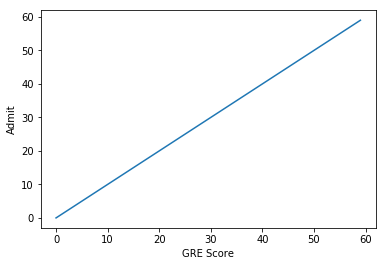

<Figure size 432x288 with 0 Axes>

In [26]:
plt.xlabel('GRE Score')
plt.ylabel('Admit')
plt.plot(range(60), range(60))
plt.show()

plt.savefig('abc.jpg')




In [27]:

#predictions by using linear regression
df=pd.DataFrame(y_test,predictions) 

df.head(10)


,Admit
0.516021,NaN
0.805821,NaN
0.776302,NaN
0.921184,NaN
0.666802,NaN
0.516917,NaN
0.606451,NaN
0.616973,NaN
0.793928,NaN
0.726538,NaN


In [28]:
#print(model.accuracy_score(predictions))
#print(model.accuracy_score)

In [29]:
#implementation by Support vector machine

In [30]:
import pandas as pd

In [31]:
data1 = pd.read_csv('Admission_predict_Ver1.1.csv', encoding = 'latin-1')
#u = pd.read_csv('Admission_predict.csv', encoding = 'latin-1')

In [32]:
#X.head

In [33]:
#from sklearn.model_selection import train_test_split
#x=data.iloc[:,:1].values
#y=data.iloc[:,:-1].values
y=data1.Admit
X=data1.drop('Admit',axis=1)
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#y.head
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=12)


In [34]:
X_test

,Serial No.,GRE Score,University Rating,TOEFL Score,SOP,LOR,CGPA
475,476,300,3,101,3.5,2.5,7.88
385,386,335,5,117,5.0,5.0,9.82
167,168,313,3,102,2.0,3.0,8.27
40,41,308,3,110,3.5,3.0,8.00
350,351,318,3,107,3.0,3.5,8.27
42,43,313,2,107,2.5,2.0,8.50
250,251,320,3,104,3.0,2.5,8.57
469,470,326,4,114,4.0,3.5,9.16
6,7,321,3,109,3.0,4.0,8.20
159,160,297,1,100,1.5,2.0,7.90


In [35]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=12)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


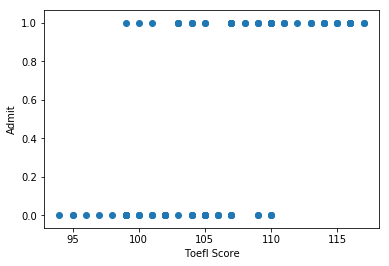

In [37]:
#making Prediction
y_pred = svclassifier.predict(X_test)
#y_test.head(20)
plt.xlabel('Toefl Score')
plt.ylabel('Admit')
#print(X_test['GRE Score'])
#plt.scatter(X_test['LOR '], y_pred)

plt.scatter(X_test['TOEFL Score'], y_pred)
plt.savefig('svm_toefl.png')


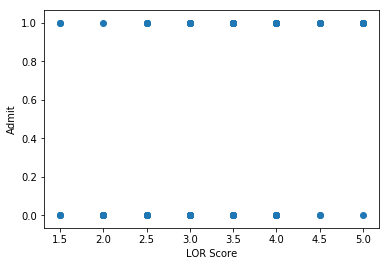

In [38]:
y_pred = svclassifier.predict(X_test)
plt.xlabel('LOR Score')
plt.ylabel('Admit')
#print(X_test['GRE Score'])
#plt.scatter(X_test['LOR '], y_pred)

plt.scatter(X_test['LOR '], y_pred)
plt.savefig('svm_lor.png')


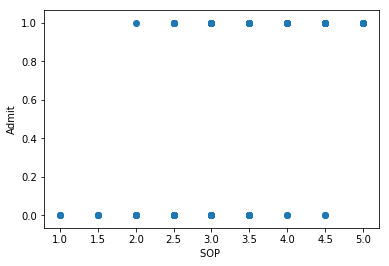

In [39]:
y_pred = svclassifier.predict(X_test)
plt.xlabel('SOP ')
plt.ylabel('Admit')
#print(X_test['GRE Score'])
#plt.scatter(X_test['LOR '], y_pred)

plt.scatter(X_test['SOP'], y_pred)
plt.savefig('svm_SOP.png')


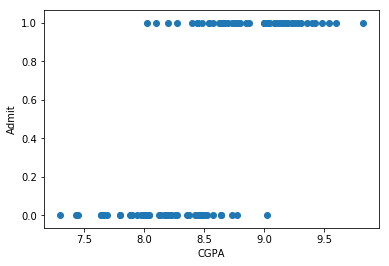

In [40]:
y_pred = svclassifier.predict(X_test)
plt.xlabel('CGPA')
plt.ylabel('Admit')
#print(X_test['GRE Score'])
#plt.scatter(X_test['LOR '], y_pred)

plt.scatter(X_test['CGPA'], y_pred)
plt.savefig('svm_cgpa.png')


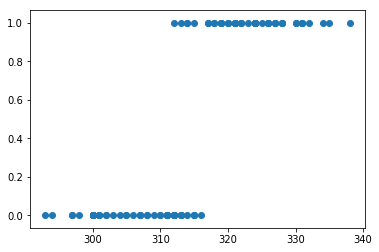

In [41]:
plt.scatter(X_test['GRE Score'], y_pred)

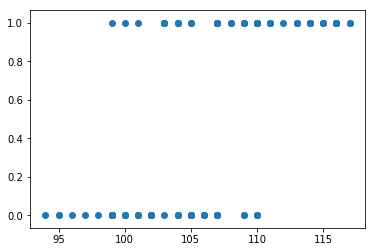

In [42]:
plt.scatter(X_test['TOEFL Score'], y_pred)

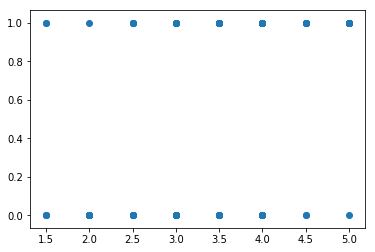

In [43]:
plt.scatter(X_test['LOR '], y_pred)

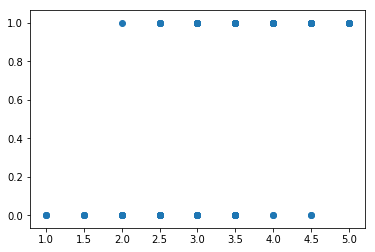

In [44]:
plt.scatter(X_test['SOP'], y_pred)

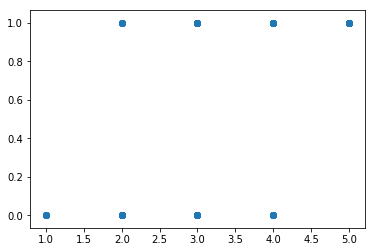

In [45]:
plt.scatter(X_test['University Rating'], y_pred)

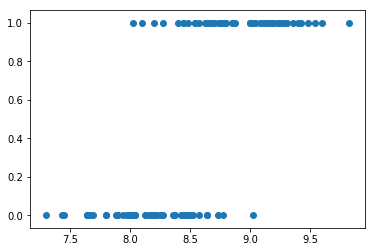

In [46]:
plt.scatter(X_test['CGPA'], y_pred)

In [58]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import pandas as pd


def import_csv_data():
    global v
    csv_file_path = askopenfilename()
    print('Admisiion_Predict.csv')
    v.set('Admission_Predict.csv')
    df = pd.read_csv('Admission_Predict.csv')
    

root = tk.Tk()
#frame=tk.Frame(root)
#frame.pack()

tk.Label(root, text='Admission.csv').grid(row=0, column=0)
#tk.Label(frame, text='Admission.csv').grid(row=0, column=0)
v = tk.StringVar()
entry = tk.Entry(root, textvariable=v).grid(row=0, column=1)
button=tk.Button(root, text='Browse Data Set',command=import_csv_data).grid(row=1, column=0)
button=widgets.Button(description="click me")

#button1=tk.Button(frame, text='Browse Data Set',command=import_csv_data).grid(row=1, column=0)
#button2=tk.Button(frame,text="clic me")

#button.display
#button1.pack(side=tk.LEFT)

display(button)
def handle_submit(sender):
    print(predictions)
button.on_click(handle_submit)
tk.Button(root, text='Close',command=root.destroy).grid(row=1, column=1)
root.mainloop()


Button(description='click me', style=ButtonStyle())

Admisiion_Predict.csv
Admisiion_Predict.csv
[0.91630367 0.8653602  0.85982953 0.76094725 0.54186131 0.94678005
 0.7416699  0.83907294 0.80733338 0.77862876 0.66639234 0.65161479
 0.92180923 0.80793739 0.93577511 0.63921106 0.61942593 0.83289513
 0.92894567 0.85273295 0.60543669 0.72230617 0.72046152 0.9647935
 0.83754595 0.53208274 0.63329805 0.79955202 0.65215706 0.62396831
 0.54677253 0.64869939 0.72321512 0.76135863 0.75674841 0.71941997
 0.65362631 0.78326352 0.71718897 0.60542437 0.57788343 0.44179147
 0.45167433 0.54563372 0.71639567 0.69301116 0.75329026 0.9506053
 0.58818454 0.68650646 0.60639028 0.61174903 0.79504367 0.60739012
 0.60989221 0.77293011 0.59440758 0.73998765 0.83274278 0.64787247
 0.62860011 0.68393305 0.64144632 0.69270326 0.68585649 0.7131703
 0.79139837 0.73707449 0.75707011 0.51170941 0.7183456  0.71570562
 0.72950686 0.84994971 0.78959126 0.79047722 0.88078065 0.72010204
 0.88912513 0.79873214 0.63924174 0.77311836 0.73494163 0.68475537
 0.58921959 0.4893281

In [ ]:
#%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy import stats

#import seaborn as sns;sns.set()


In [ ]:
#from sklearn.datasets.samples_generator import make_blobs 
#X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
#plt.scatter(X[:, 0],X[:, 1],c=y,s=50,cmap='autmn')

In [56]:
from tkinter import *
from tkinter.messagebox import *
import sklearn 
from joblib import load
from sklearn.svm import SVC
#from sklearn.svm import train_test_split
import os

def get_values():
    """Returns the values of the txtboxes"""
    return [
        int(num1.get()),
        int(num2.get()),
        int(num3.get()),
        float(num4.get()),
        float(num5.get()),
        float(num6.get())
    ]


def make_prediction():
    '''Runs the model.jbl and get result'''
    if not os.path.exists("model.jbl"):
        print("model.jbl not found. Please run Train.ipynb")
        return
    x_values = get_values()
    model = load("model.jbl")
    admit = model.predict([x_values])[0]
    prediction = "Admission: " + ("Yes" if admit else "No")
    show_txtbx.delete(0, 'end')
    show_txtbx.insert(0, prediction)


main = Tk()
main.geometry("300x300")

# Add university rating
Label(main, text="Enter GRE SCORE:").grid(row=0)
Label(main, text="Enter TOEFL score:").grid(row=1) 
Label(main, text="Enter University rating:").grid(row=2)
Label(main, text="Enter SOP:").grid(row=3)
Label(main, text="Enter LOR:").grid(row=4)
Label(main, text="Enter CGPA:").grid(row=5)
Label(main, text="Prediction:").grid(row=6)


num1 = Entry(main)
num2 = Entry(main)
num3 = Entry(main)
num4 = Entry(main)
num5 = Entry(main)
num6 = Entry(main)

show_txtbx = Entry(main)


num1.grid(row=0, column=1)
num2.grid(row=1, column=1)
num3.grid(row=2, column=1)
num4.grid(row=3, column=1)
num5.grid(row=4, column=1)
num6.grid(row=5, column=1)

show_txtbx.grid(row=6, column=1)


Button(main, text="Quit", command=main.destroy).grid(row=8, column=0, sticky=W, pady=4,padx=3)
Button(main, text="Show", command=make_prediction).grid(row=8, column=1, sticky=W, pady=4,padx=3)

mainloop()


In [57]:
import numpy as np
from tkinter import *
from tkinter.messagebox import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt
main = Tk()
main.geometry("700x700")

def make_prediction():
    data = pd.read_csv('Admission_predict.csv', encoding = 'latin-1')
    canvas=FigureCanvasTkAgg(fig,main)
    canvas.get_tk_widget().pack(side=Tk.TOP,fill=Tk.BOTH,expand=1)
    x=df['GRe Score']
    y=df['Admit']
    x=x.reshape(len(x),1)
    y=y.reshape(len(y),1)
    x_train=x[:-230]
    x_test=y[-230:]
    y_train=x[:-230]
    y_test=y[-230:]
    
    model=lm().fit(x_train,y_train)
    predictions=model.predict(x_test)
    plt.scatter(y_test,predictions)
    plt.xlabel('GRE Score',s=20)
    plt.ylabel('Admit',s=20)
    fig=plt.Figure()
    #fig.plot(range(60), range(60))

    ax=fig.add_subplot(111)
    plt.savefig('abc.jpg')

    fig.canvas.draw_idle()
    fig.subplots_adjust(bottom=0.25)
    ax.plot(x,y)


# Add university rating
Label(main, text="Comparison of the graphs:").grid(row=0)


Button(main, text="Quit", command=main.destroy).grid(row=8, column=0, sticky=W, pady=4,padx=3)

Button(main, text="SVM graph", command=make_prediction).grid(row=8, column=1, sticky=W, pady=4,padx=3)

Button(main, text="Linear regression graph",command=make_prediction).grid(row=8, column=3, sticky=W, pady=4,padx=3)
Button(main, text="KNN graph",command=main.destroy).grid(row=8, column=6, sticky=W, pady=4,padx=3)

#Button(main, text="graph",command=main.destroy).grid(row=8, column=6, sticky=W, pady=4,padx=3)


mainloop()